In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold

In [6]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


-Age : Age of the patient

-Sex : Sex of the patient

-Significado de cp: 
       Value 0: typical angina
       Value 1: atypical angina
       Value 2: non-anginal pain
       Value 3: asymptomatic

-trtbps : resting blood pressure (in mm Hg)

-chol: cholesterol in mg/dl fetched via BMI sensor

-fbs: (fasting blood sugar > 120 mg/dl)
       1 = true
       0 = false

-rest_ecg: resting electrocardiographic results
       Value 0: normal
       Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
       Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
       
-thalach: maximum heart rate achieved

-exang: exercise induced angina
       1 = yes
       0 = no
       
-old peak: ST depression induced by exercise relative to rest

-slp: the slope of the peak exercise ST segment
       0 = unsloping
       1 = flat
       2 = downsloping

-caa: number of major vessels (0-3)

-thall : thalassemia
       0 = null
       1 = fixed defect
       2 = normal
       3 = reversable defect
       
-output: enfermo (1) y sano (0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


No hay mucho que modificar de los datos, por lo que podemos proseguir con el analisis. 

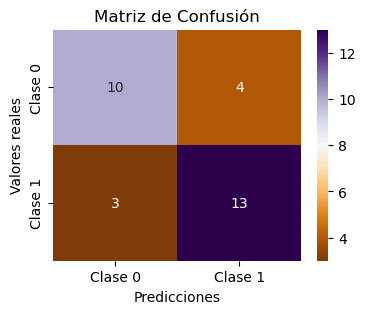

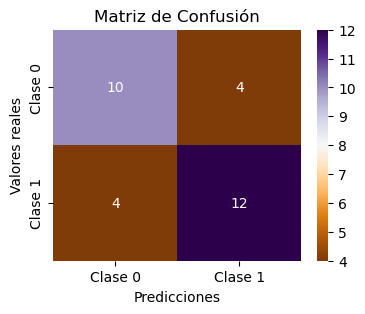

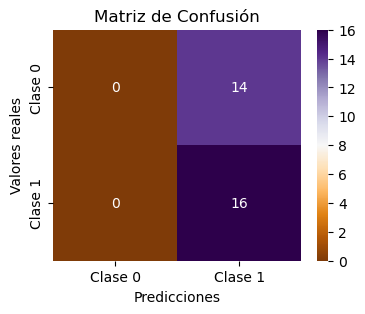

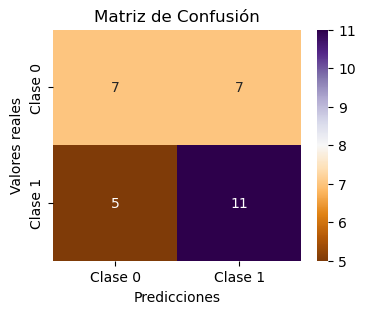

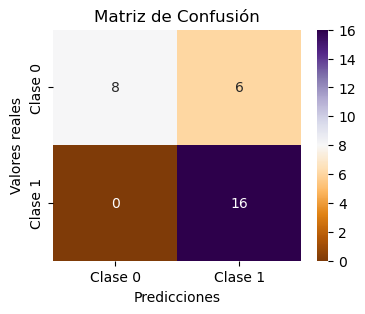

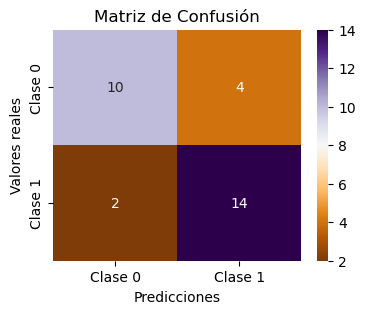

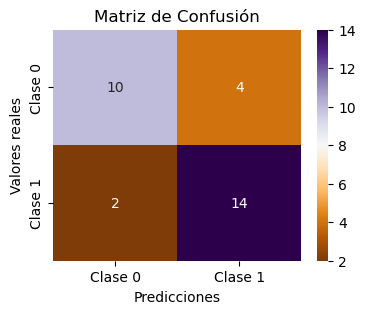

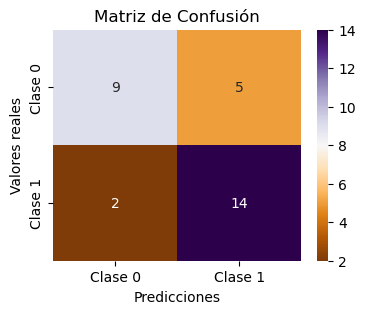

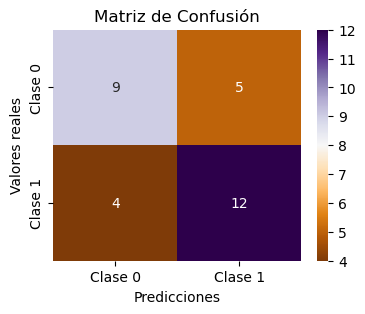

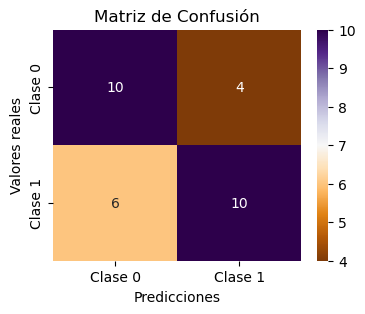

              Modelo  Exactitud  Sensibilidad  Especificidad
0  Nearest Neighbors  65.354839     71.580882      57.857143
1         Linear SVM  83.483871     89.522059      76.153846
2            RBF SVM  54.451613    100.000000       0.000000
3   Gaussian Process  58.784946     64.963235      51.483516
4      Decision Tree  76.827957     84.080882      70.989011
5      Random Forest  80.827957     86.580882      75.604396
6         Neural Net  81.827957     89.522059      73.241758
7           AdaBoost  81.129032     85.330882      76.208791
8        Naive Bayes  80.505376     82.941176      77.582418
9                QDA  79.483871     80.477941      78.296703


In [13]:

# Separar el dataset
X = df.drop('output', axis=1)  # Features
y = df['output']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelos = [
    ("Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Linear SVM", SVC(kernel='linear')),
    ("RBF SVM", SVC(gamma=2, C=1)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5)),
    ("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ("Neural Net", MLPClassifier(alpha=1, max_iter=1000)),
    ("AdaBoost", AdaBoostClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("QDA", QuadraticDiscriminantAnalysis())
]

# Crear un DataFrame vacío para almacenar las métricas
metricas_df = pd.DataFrame(columns=['Modelo', 'Exactitud', 'Sensibilidad', 'Especificidad'])

# Realizar la validación cruzada con k-folds (k=10 en este ejemplo)
k_folds = 10
skf = StratifiedKFold(n_splits=k_folds)

for nombre, modelo in modelos:
    # Realizar validación cruzada
    scores = cross_val_score(modelo, X, y, cv=skf, scoring='accuracy')
    
    sensibilidades = []
    especificidades = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Entrenar el modelo
        modelo.fit(X_train, y_train)
        
        # Realizar predicciones
        y_pred = modelo.predict(X_test)
        
        # Calcular la matriz de confusión
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Calcular sensibilidad y especificidad
        sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
        especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        
        sensibilidades.append(sensibilidad)
        especificidades.append(especificidad)

    # Agregar métricas al DataFrame
    metricas_df = metricas_df.append({
        'Modelo': nombre,
        'Exactitud': scores.mean() * 100,
        'Sensibilidad': sum(sensibilidades) / len(sensibilidades) * 100,
        'Especificidad': sum(especificidades) / len(especificidades) * 100
    }, ignore_index=True)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Crear un heatmap de la matriz de confusión
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuOr',
                xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title('Matriz de Confusión')
    plt.show()
    

    

# Imprimir la tabla de métricas
print(metricas_df)

Revision de las predicciones  de los modelos sin reduccion de dimensionalidad 

El mejor parametro de exactitud (83) fue para el modelo SVM lineal. La sensibilidad y la especificidad para este modelo 
fueron 89 y 76 respectivamente. 
La exactitud del modelo SVM lineal fue superada por una metrica de 100 para RBF SVM sin embargo es un valor que resulta extraño, a su vez, random forest logro igualarlo en esta metrica.
Finalemnte la especificidad fue de 76, superado por Naive Bayes (77) y QDA (78), por lo que podriamos concluir que a simple vista los 3 mejores modelos son: 
- Linear SVM
- Random Forest 
- Adaboost
Para esta decision se evaluo que el modelo tuviera un desempeño equilibrado y que fuera competitivo con el primero seleccionado (Linear SVM). 

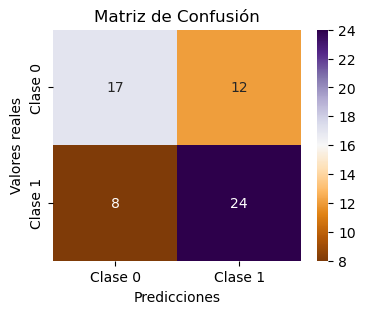

Modelo: Nearest Neighbors
Exactitud: 62.39%
Sensibilidad: 67.21%
Especificidad: 56.48%


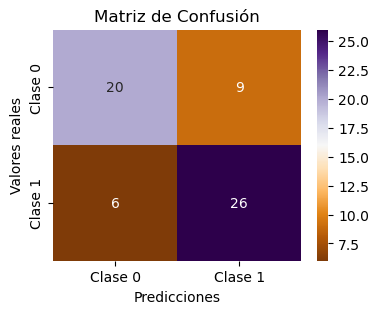

Modelo: Linear SVM
Exactitud: 70.99%
Sensibilidad: 78.64%
Especificidad: 61.65%


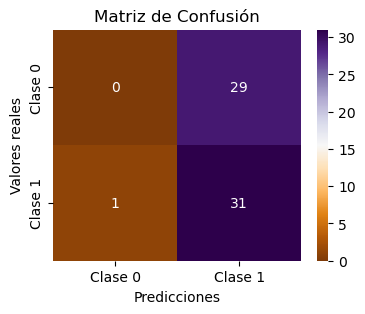

Modelo: RBF SVM
Exactitud: 54.81%
Sensibilidad: 96.95%
Especificidad: 4.40%


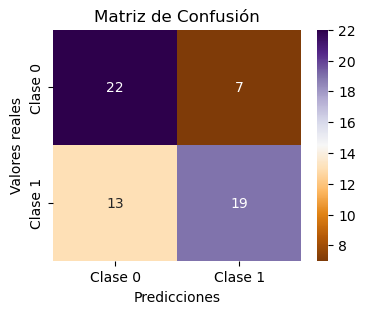

Modelo: Gaussian Process
Exactitud: 69.31%
Sensibilidad: 81.18%
Especificidad: 55.16%


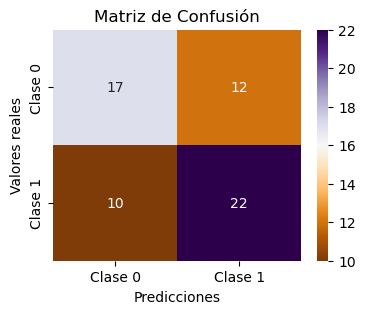

Modelo: Decision Tree
Exactitud: 65.99%
Sensibilidad: 72.06%
Especificidad: 60.22%


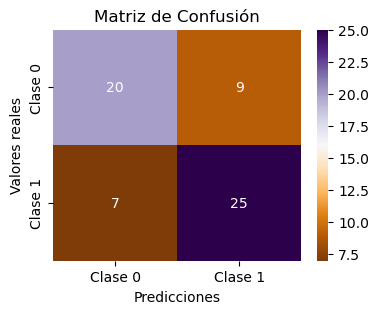

Modelo: Random Forest
Exactitud: 68.01%
Sensibilidad: 73.86%
Especificidad: 61.76%


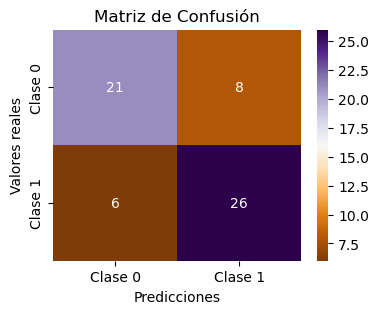

Modelo: Neural Net
Exactitud: 69.03%
Sensibilidad: 75.11%
Especificidad: 60.16%


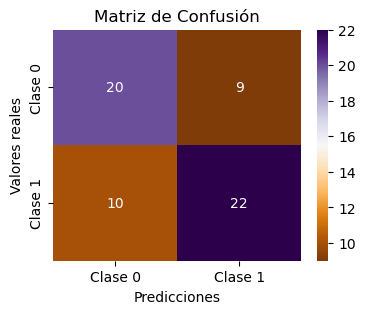

Modelo: AdaBoost
Exactitud: 64.72%
Sensibilidad: 67.94%
Especificidad: 60.88%


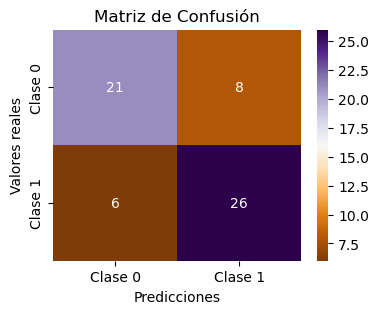

Modelo: Naive Bayes
Exactitud: 69.98%
Sensibilidad: 80.44%
Especificidad: 57.25%


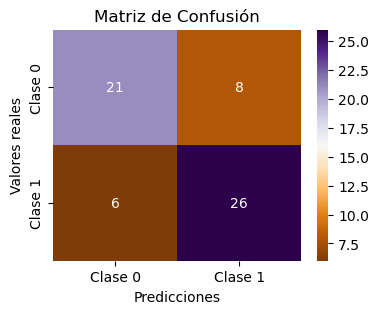

Modelo: QDA
Exactitud: 69.66%
Sensibilidad: 79.85%
Especificidad: 57.25%


In [11]:
# Realizar PCA
pca = PCA(n_components=2)  # Número de componentes principales a mantener
X_pca = pca.fit_transform(X)

# Dividir datos PCA en entrenamiento y prueba
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Definir modelos
modelos = [
    ("Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Linear SVM", SVC(kernel='linear')),
    ("RBF SVM", SVC(gamma=2, C=1)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5)),
    ("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ("Neural Net", MLPClassifier(alpha=1, max_iter=1000)),
    ("AdaBoost", AdaBoostClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("QDA", QuadraticDiscriminantAnalysis())
]

# Entrenar y evaluar modelos
for nombre, modelo in modelos:
    # Entrenar el modelo
    modelo.fit(X_train_pca, y_train)
    
    # Realizar predicciones
    y_pred = modelo.predict(X_test_pca)
    
    # Realizar la validación cruzada
    scores = cross_val_score(modelo, X_pca, y, cv=StratifiedKFold(n_splits=10), scoring='accuracy')
    
    sensibilidades = []
    especificidades = []
    
    for train_index, test_index in StratifiedKFold(n_splits=10).split(X_pca, y):
        X_train_cv, X_test_cv = X_pca[train_index], X_pca[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]
        
        # Entrenar el modelo
        modelo.fit(X_train_cv, y_train_cv)
        
        # Realizar predicciones
        y_pred_cv = modelo.predict(X_test_cv)
        
        # Calcular la matriz de confusión
        conf_matrix = confusion_matrix(y_test_cv, y_pred_cv)
        
        # Calcular sensibilidad y especificidad
        sensibilidad = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
        especificidad = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
        
        sensibilidades.append(sensibilidad)
        especificidades.append(especificidad)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Crear un heatmap de la matriz de confusión
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuOr',
                xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title('Matriz de Confusión')
    plt.show()

    # Imprimir métricas
    print(f"Modelo: {nombre}")
    print(f"Exactitud: {scores.mean() * 100:.2f}%")
    print(f"Sensibilidad: {sum(sensibilidades) / len(sensibilidades) * 100:.2f}%")
    print(f"Especificidad: {sum(especificidades) / len(especificidades) * 100:.2f}%")
    
    
######################################################################################################################    
  

En la siguiente tabla se resumen las metricas de analisis de los modelos habiendo aplicado antes PCA. 

| Modelos | Exactitud | Sensibilidad | Especificidad |
|-----------|-----------|-----------|-----------|
| Nearest Neighbors | 78.24%| 81.88% | 74.07% |
| Linear SVM | 81.52% | 86.65%| 75.49% |
| RBF SVM | 80.23% | 87.35% | 71.87% |
| Gaussian Process | 81.84% | 86.62% | 76.21% |
| Decision Tree| 77.26% | 81.88% | 71.92%|
| Random Forest | 77.91% | 86.73% | 67.58% |
| Neural Net | 80.87% | 86.65% | 75.49% |
| AdaBoost | 76.90%|  84.34% | 68.30% |
| Naive Bayes | 82.19% | 90.26% | 72.64% |
| QDA| 81.85%| 88.46%| 74.07%|

Podemos observar Naive bayes, QDA y Gaussian Process fueron los 3 modelos mas balanceados. Obtuvieron las mejores metricas en los 3 aspectos compoaradolos unos con los otros. 
Respecto a los datos de la primera corrida (sin PCA) los cuales se observan a continucacion
|       Modelo       |  Exactitud  | Sensibilidad | Especificidad |
|-------------------|------------|--------------|--------------|
| Nearest Neighbors  |  65.354839  |  71.580882   |   57.857143   |
|    Linear SVM      |  83.483871  |  89.522059   |   76.153846   |
|       RBF SVM      |  54.451613  | 100.000000   |   0.000000    |
| Gaussian Process   |  58.784946  |  64.963235   |   51.483516   |
|   Decision Tree    |  76.182796  |  82.830882   |   70.274725   |
|   Random Forest    |  81.182796  |  85.441176   |   76.923077   |
|    Neural Net      |  79.849462  |  88.272059   |   73.241758   |
|      AdaBoost      |  81.129032  |  85.330882   |   76.208791   |
|   Naive Bayes      |  80.505376  |  82.941176   |   77.582418   |
|         QDA        |  79.483871  |  80.477941   |   78.296703   |


El modelo decision tree se quedo casi igual y random forest empeoro un poco respecto a la version sin PCA.
En general el analisis PCA si mejoro de manera significativa la eficiencia de la mayoria de los modelos. SE 
realizo el analisis con t-SNE pero no existian cambios significativos respecto a PCA.
